### Import relevant packages

In [41]:
import pandas as pd
from IPython.display import display, HTML

import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# for plotting purposes
%matplotlib inline

### Import custom functions

In [42]:
import loop11_functions as beta
%run loop11_functions.py

### Import cleaned data - Note: To get cleaned data, run clean before this point

In [68]:
clean_df = pd.read_csv('ttlp_test_clean.csv')
clean_df

,Unnamed: 0,Participant No.,CustomID,IP Address,Date Started,Date Completed,User Agent,Total Time Spent,Avg Time Taken,Avg Page Views,...,How satisfied did you feel using this website?,I trust the information on the website.,I would use this section of the ato.gov.au website in the future.,I found it easy to find the information I was looking for.,The content and language was easy to understand.,Give us your feedback on how we can improve the tax time lodgment pages.,* Are you an ATO employee?,* Which of the following best describes you?,"Other, please specify (2)",Which age group do you belong to?
0,3,Participant 6,NaN,119.225.114.60,10/05/17 15:39,10/05/17 15:43,Mozilla/5.0 (Linux; Android 7.0; SAMSUNG SM-G9...,204,31.7,2.3,...,Very satisfied,Strongly agree,Strongly agree,Strongly agree,Strongly agree,NaN,Yes,Individual,NaN,26-45
1,4,Participant 15,NaN,121.127.217.158,10/05/17 15:41,10/05/17 15:48,Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7....,442,51.3,2.3,...,Neither satisfied nor dissatisfied,Neither agree nor disagree,Neither agree nor disagree,Disagree,Neither agree nor disagree,the lodge online with mytax makes it confusing...,No,Tax agent,NaN,26-45
2,5,Participant 20,NaN,180.149.192.135,10/05/17 15:42,10/05/17 15:48,Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7....,334,55.0,2.3,...,Neither satisfied nor dissatisfied,Agree,Neither agree nor disagree,Agree,Agree,NaN,Yes,Individual,NaN,26-45
3,6,Participant 24,NaN,14.203.115.50,10/05/17 15:43,10/05/17 15:53,Mozilla/5.0 (Windows NT 6.3; WOW64; rv:53.0) G...,574,142.0,1.3,...,Neither satisfied nor dissatisfied,Neither agree nor disagree,Agree,Disagree,Neither agree nor disagree,NaN,No,Individual,NaN,26-45
4,7,Participant 26,NaN,180.149.192.135,10/05/17 15:44,10/05/17 15:56,Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7....,710,38.3,1.0,...,Dissatisfied,Neither agree nor disagree,Agree,Disagree,Agree,NaN,Yes,Individual,NaN,26-45
5,8,Participant 30,NaN,180.149.192.135,10/05/17 15:46,10/05/17 15:57,Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7....,679,50.3,2.3,...,Satisfied,Agree,Agree,Neither agree nor disagree,Agree,NaN,Yes,Individual,NaN,26-45
6,9,Participant 31,NaN,180.149.192.133,10/05/17 15:46,10/05/17 16:12,Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7....,1576,473.7,2.7,...,Satisfied,Agree,Agree,Agree,Agree,NaN,Yes,Individual,NaN,46-65
7,10,Participant 35,NaN,220.101.113.10,10/05/17 15:48,10/05/17 15:55,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_6...,366,38.0,1.7,...,Very dissatisfied,Strongly agree,Strongly agree,Agree,Neither agree nor disagree,Speed up prefill,No,Individual,NaN,26-45
8,11,Participant 36,NaN,175.45.100.234,10/05/17 15:48,10/05/17 15:55,Mozilla/5.0 (Linux; Android 7.1.2; Pixel XL Bu...,372,37.7,1.0,...,Neither satisfied nor dissatisfied,Agree,Strongly agree,Strongly agree,Strongly agree,NaN,No,Individual,NaN,26-45
9,12,Participant 37,NaN,119.225.114.61,10/05/17 15:50,10/05/17 15:54,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,218,31.3,2.7,...,Dissatisfied,Agree,Agree,Disagree,Neither agree nor disagree,too much text,Yes,Individual,NaN,46-65


### Define variables 

In [69]:
# Define sample size for future use in the script as a variable called N
N = len(clean_df)
N

183

In [54]:
# Delare variable to store folder file location 
# Note: Remember to create these folders
folder = "Graphs/standard_graphs/"

In [70]:
# For reference later when picking out data in specific column
cols = list(clean_df.columns.values) 
cols

['Unnamed: 0',
 'Participant No.',
 'CustomID',
 'IP Address',
 'Date Started',
 'Date Completed',
 'User Agent',
 'Total Time Spent',
 'Avg Time Taken',
 'Avg Page Views',
 ' Task panel instructions',
 'Page Views',
 'Time Spent',
 'Task 1: Choosing a lodgment method',
 'Task 1: Choosing a lodgment method - Page Views',
 'Task 1: Choosing a lodgment method - Time Spent',
 'Task 2: Finding info on next steps',
 'Task 2: Finding info on next steps - Page Views',
 'Task 2: Finding info on next steps - Time Spent',
 '* "I found it easy to find the right lodgment method."',
 '* "I feel confident acting on the information on the website."',
 '* "I found the content easy to read and understand."',
 '* Which lodgment method did you choose?',
 'Other, please specify',
 '* What were your reasons for choosing that lodgment method?',
 'Is there anything you would improve on this design?',
 '* "Based on the information I found I would know what to do to submit my tax return."',
 'Based on this tas

## Tasks and Questions

### Task 1: Choosing a lodgment method 

#### Completion rates

CONFIDENCE INTERVAL:  Task 1: Choosing a lodgment method 0.0697984587243


,Task 1: Choosing a lodgment method (N),Task 1: Choosing a lodgment method (%)
Task Result,,
success,116,0.633880
fail,64,0.349727
abandon,3,0.016393


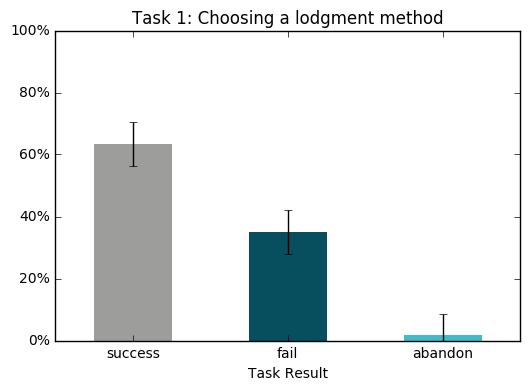

In [56]:
beta.task_completion_rates_N(clean_df, [cols[13]], N, folder)

#### Q: "I found it easy to find the right lodgment method."

SAMPLE SIZE: 183 (* "I found it easy to find the right lodgment method.")
TOTAL %: 1.0 (* "I found it easy to find the right lodgment method.")


,"* ""I found it easy to find the right lodgment method."" (N)","* ""I found it easy to find the right lodgment method."" (%)"
Agree,98,0.535519
Neither agree nor disagree,43,0.234973
Disagree,42,0.229508


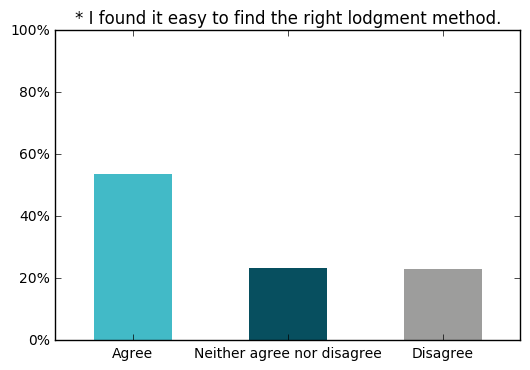

In [57]:
beta.likert_results(clean_df, [cols[19]], beta.grapher, folder)

#### Q: "I feel confident acting on the information on the website."

SAMPLE SIZE: 183 (* "I feel confident acting on the information on the website.")
TOTAL %: 1.0 (* "I feel confident acting on the information on the website.")


,"* ""I feel confident acting on the information on the website."" (N)","* ""I feel confident acting on the information on the website."" (%)"
Agree,115,0.628415
Neither agree nor disagree,41,0.224044
Disagree,27,0.147541


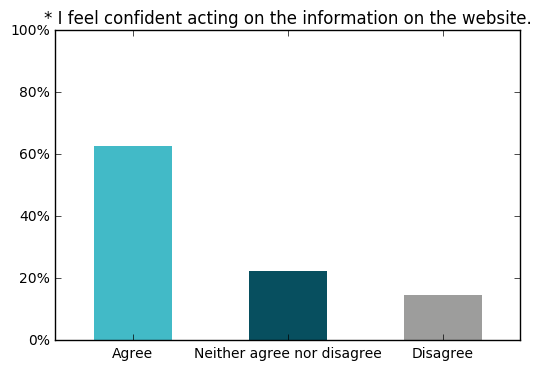

In [58]:
beta.likert_results(clean_df, [cols[20]], beta.grapher, folder)

#### Q: "I found the content easy to read and understand."

SAMPLE SIZE: 183 (* "I found the content easy to read and understand.")
TOTAL %: 1.0 (* "I found the content easy to read and understand.")


,"* ""I found the content easy to read and understand."" (N)","* ""I found the content easy to read and understand."" (%)"
Agree,132,0.721311
Neither agree nor disagree,38,0.207650
Disagree,13,0.071038


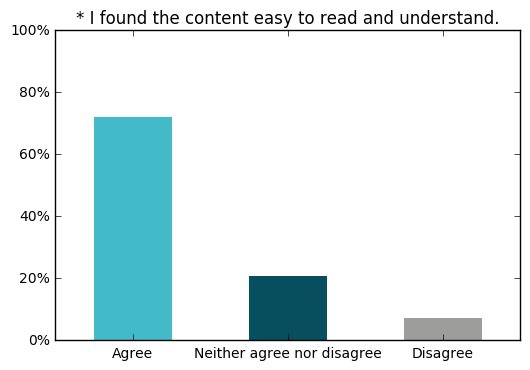

In [59]:
beta.likert_results(clean_df, [cols[21]], beta.grapher, folder)

#### Q: "Which lodgment method did you choose?"

SAMPLE SIZE: 174 (* Which lodgment method did you choose?)
TOTAL %: 1.0 (* Which lodgment method did you choose?)


,* Which lodgment method did you choose? (N),* Which lodgment method did you choose? (%)
myTax,114,0.655172
Tax agent,55,0.316092
I'd rather not say,3,0.017241
Submit a paper lodgment,2,0.011494


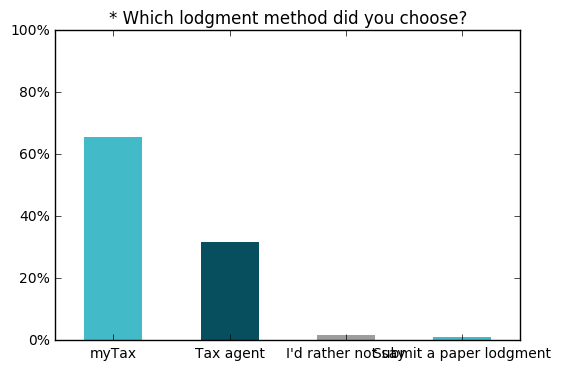

In [60]:
beta.likert_results(clean_df, [cols[22]], beta.grapher, folder)

In [61]:
beta.other_responses(clean_df, cols[23])

NUMBER OF RESPONSES:  9


'Start your tax return with myTax'

'I hit the do i need ot lodge tool link'

"I couldn't work it out completely. Mytax was the only option that spoke of rental schedules but that didn't correlate with the scenario of multiple properties that you set at the beginning of the tasks. However as it was the only option (after clicking all three) that the words rental in it, I would choose this option to start and check to see if it was right as I progressed."

"I didn't. I abondoned the task."

'That was not the question'

"I couldn't be certain based on the information under the myTax method. Tax agent method information did not provide any helpful advice. I opted to use the Do I need to lodge a tax return tool of which I only saw the link to on my 3rd attempt to work out where to go for the right information."

'was unable to locate or work out which one. not very clear'

'Abandoned'

'I can\'t tell how this works. I clicked on "Start your tax return with myTax" and a series of questions ensues.'

### Task 2 - Finding info on next steps

#### Completion rates

CONFIDENCE INTERVAL:  Task 2: Finding info on next steps 0.0720521674817


,Task 2: Finding info on next steps (N),Task 2: Finding info on next steps (%)
Task Result,,
success,82,0.448087
fail,99,0.540984
abandon,2,0.010929


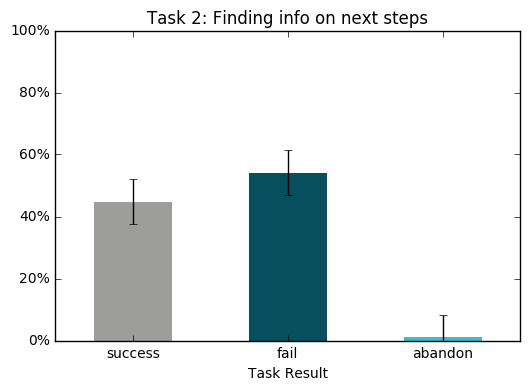

In [62]:
beta.task_completion_rates_N(clean_df, [cols[16]], N, folder)

#### Q: "Based on the information I found I would know what to do to submit my tax return."

SAMPLE SIZE: 183 (* "Based on the information I found I would know what to do to submit my tax return.")
TOTAL %: 1.0 (* "Based on the information I found I would know what to do to submit my tax return.")


,"* ""Based on the information I found I would know what to do to submit my tax return."" (N)","* ""Based on the information I found I would know what to do to submit my tax return."" (%)"
Agree,149,0.814208
Neither agree nor disagree,21,0.114754
Disagree,13,0.071038


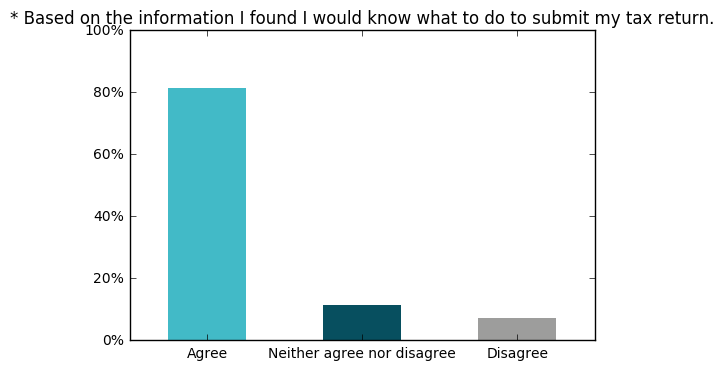

In [63]:
beta.likert_results(clean_df, [cols[26]], beta.grapher, folder)

#### Q: Based on this task, what would be the best method to lodge online?

SAMPLE SIZE: 179 (Based on this task, what would be the best method to lodge online?)
TOTAL %: 1.0 (Based on this task, what would be the best method to lodge online?)


,"Based on this task, what would be the best method to lodge online? (N)","Based on this task, what would be the best method to lodge online? (%)"
myTax,174,0.972067
Tax agent,5,0.027933


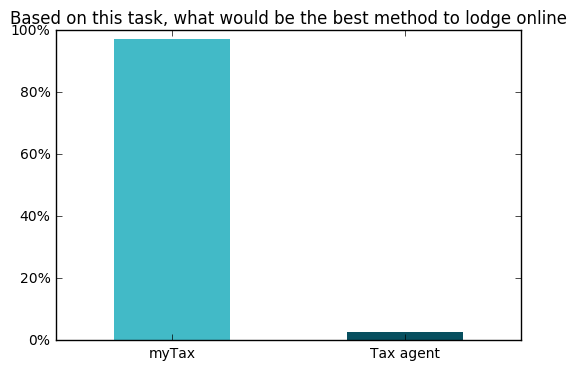

In [65]:
beta.single_answer(clean_df, [cols[27]], beta.grapher, folder)

In [66]:
beta.other_responses(clean_df, cols[28])

NUMBER OF RESPONSES:  2


"myTax of course - the others don't align with the scenario provided - stupid question"

'mygov'

### Post survey

#### Q: How satisfied did you feel using this website?

SAMPLE SIZE: 182 (How satisfied did you feel using this website?)
TOTAL %: 1.0 (How satisfied did you feel using this website?)


,How satisfied did you feel using this website? (N),How satisfied did you feel using this website? (%)
Satisfied,125,0.686813
Neither satisfied nor dissatisfied,38,0.208791
Dissatisfied,19,0.104396


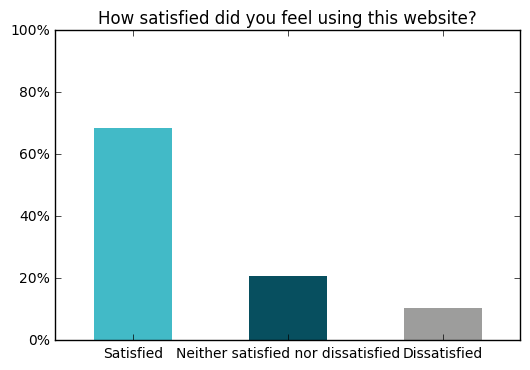

In [71]:
beta.likert_results(clean_df, [cols[29]], beta.grapher, folder)

#### Q: "I trust the information on the website."

SAMPLE SIZE: 182 (I trust the information on the website.)
TOTAL %: 1.0 (I trust the information on the website.)


,I trust the information on the website. (N),I trust the information on the website. (%)
Agree,148,0.813187
Neither agree nor disagree,28,0.153846
Disagree,6,0.032967


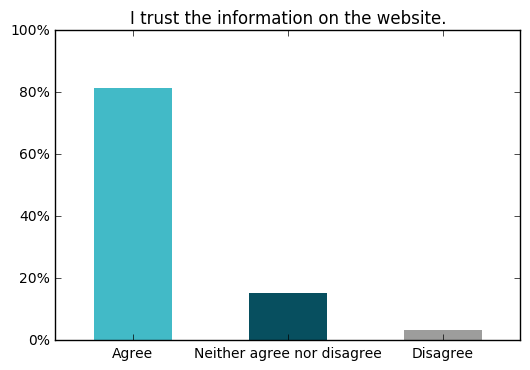

In [72]:
beta.likert_results(clean_df, [cols[30]], beta.grapher, folder)

#### Q: I would use this section of the ato.gov.au website in the future. 

SAMPLE SIZE: 182 (I would use this section of the ato.gov.au website in the future.)
TOTAL %: 0.9999999999999999 (I would use this section of the ato.gov.au website in the future.)


,I would use this section of the ato.gov.au website in the future. (N),I would use this section of the ato.gov.au website in the future. (%)
Agree,127,0.697802
Neither agree nor disagree,37,0.203297
Disagree,18,0.098901


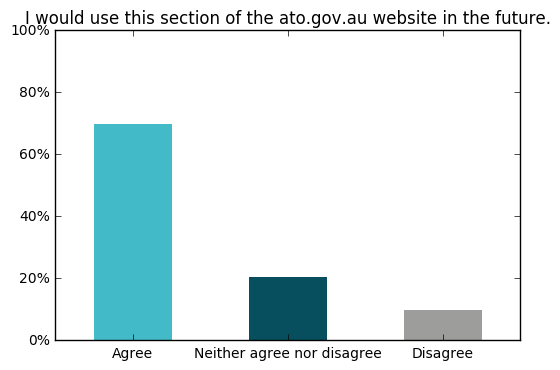

In [73]:
beta.likert_results(clean_df, [cols[31]], beta.grapher, folder)

#### Q: I found it easy to find the information I was looking for.

SAMPLE SIZE: 180 (I found it easy to find the information I was looking for.)
TOTAL %: 1.0 (I found it easy to find the information I was looking for.)


,I found it easy to find the information I was looking for. (N),I found it easy to find the information I was looking for. (%)
Agree,120,0.666667
Neither agree nor disagree,35,0.194444
Disagree,25,0.138889


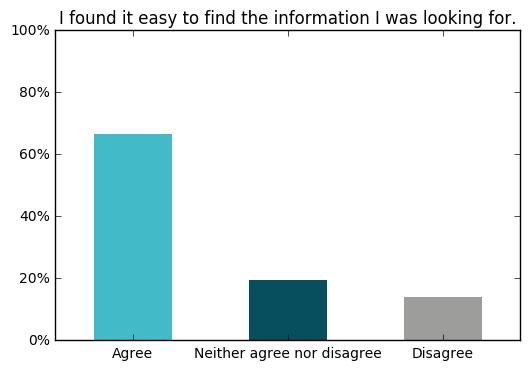

In [74]:
beta.likert_results(clean_df, [cols[32]], beta.grapher, folder)

#### Q: The content and language was easy to understand.

SAMPLE SIZE: 181 (The content and language was easy to understand.)
TOTAL %: 0.9999999999999999 (The content and language was easy to understand.)


,The content and language was easy to understand. (N),The content and language was easy to understand. (%)
Agree,145,0.801105
Neither agree nor disagree,25,0.138122
Disagree,11,0.060773


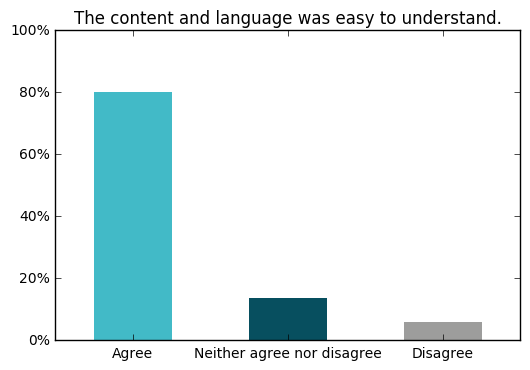

In [75]:
beta.likert_results(clean_df, [cols[33]], beta.grapher, folder)

### Demographics

SAMPLE SIZE: 183 (* Are you an ATO employee?)
TOTAL %: 1.0 (* Are you an ATO employee?)


,* Are you an ATO employee? (N),* Are you an ATO employee? (%)
Yes,102,0.557377
No,81,0.442623


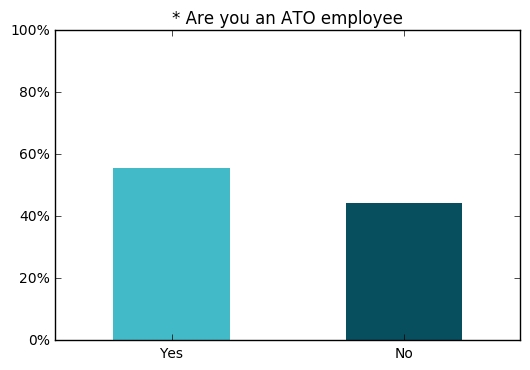

In [76]:
beta.single_answer(clean_df, [cols[35]], beta.grapher, folder)

SAMPLE SIZE: 183
NO. ANSWERS: 183


,* Which of the following best describes you? (N),* Which of the following best describes you? (%)
Individual,135,0.737705
Small business,21,0.114754
Tax agent,14,0.076503
Sole trader/self-employed,11,0.060109
Not-for-profit,1,0.005464
Large business,1,0.005464


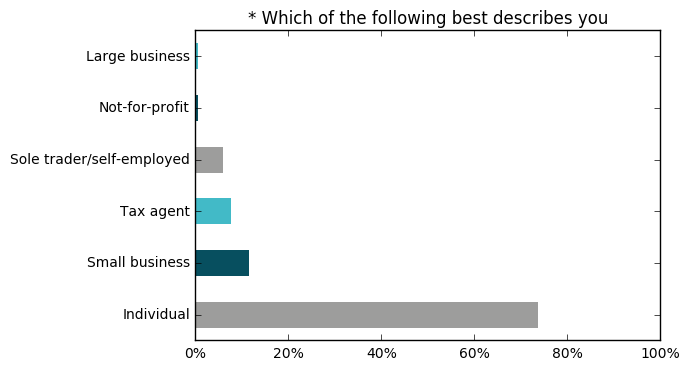

In [78]:
beta.multiple_answer(clean_df, [cols[36]], beta.grapher_horizontal, folder)

In [79]:
beta.other_responses(clean_df, cols[37])

NUMBER OF RESPONSES:  8


'Self employed business advisor'

"ATO employee - I thought I answered that in the last question, but I can't go back and check..."

'BAS Agent'

'Retiree'

'Individual and self employed'

'individual as well as family business owner'

'enabling team'

'BAS Agent'

SAMPLE SIZE: 183
NO. ANSWERS: 182


,Which age group do you belong to? (N),Which age group do you belong to? (%)
26-45,87,0.475410
46-65,79,0.431694
Older than 65,11,0.060109
18-25,5,0.027322


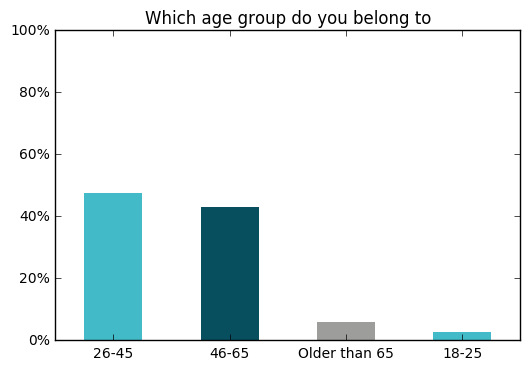

In [80]:
beta.multiple_answer(clean_df, [cols[38]], beta.grapher, folder)